In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Feature 경로 지정

In [2]:

aligned_features_path = os.getcwd() + f'/val_set/aligned_features_2d'
spatial_features_path = os.getcwd() + f'/val_set/spatial_features_2d'
src_features_for_align_2x_path = os.getcwd() + f'/val_set/src_features_for_align_2x'
src_features_for_align_4x_path = os.getcwd() + f'/val_set/src_features_for_align_4x'
src_features_for_align_8x_path = os.getcwd() + f'/val_set/src_features_for_align_8x'

In [3]:
target_scene_idx = int(input("분석하고자 하는 Scene의 Index를 입력하세요.: "))
target_frame_idx = int(input("분석하고자 하는 Frame의 Index를 입력하세요.: "))
print(f'Target scene index: {target_scene_idx}')
print(f'Target frame index: {target_frame_idx}')


Target scene index: 0
Target frame index: 20


In [64]:
img_path = '/home/junhyung/workspace_common/visualization/nuscenes/val_set/results'
cur_img = cv2.imread(img_path + f'/scene_{target_scene_idx}/{target_frame_idx}_ori.jpg', cv2.IMREAD_COLOR)
scale_factor=4
W = cur_img.shape[0]//scale_factor
H = cur_img.shape[1]//scale_factor

cur_img_resize = cv2.resize(cur_img, dsize=(H, W), interpolation=cv2.INTER_AREA)
#cur_img = cv2.imread('/home/junhyung/workspace_common/visualization/nuscenes/val_set/results/scene_0/20_ori.jpg', cv2.IMREAD_COLOR)
print(type(cur_img))
print(cur_img.shape)
print(cur_img_resize.shape)
cv2.imshow('current image',cur_img_resize)
cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
(3750, 4000, 3)
(937, 1000, 3)


In [62]:
#cur_img_resize = cur_img_resize.astype(np.uint8)
#cur_img_resize = cv2.applyColorMap(cur_img_resize, cv2.COLORMAP_JET)

#plt.imshow(cur_img_resize)

In [49]:
aligned_t_1 = np.load(aligned_features_path + f'/scene_{target_scene_idx}_frame_{target_frame_idx}_t_1.npy').transpose(0,2,3,1)
aligned_t_2 = np.load(aligned_features_path + f'/scene_{target_scene_idx}_frame_{target_frame_idx}_t_2.npy').transpose(0,2,3,1)
spatial_t_1 = np.load(spatial_features_path + f'/scene_{target_scene_idx}_frame_{target_frame_idx}_t_1.npy').transpose(0,2,3,1)
spatial_t_2 = np.load(spatial_features_path + f'/scene_{target_scene_idx}_frame_{target_frame_idx}_t_2.npy').transpose(0,2,3,1)
spatial_t_0 = np.load(spatial_features_path + f'/scene_{target_scene_idx}_frame_{target_frame_idx}_t_0.npy').transpose(0,2,3,1)

feature_list = np.concatenate([spatial_t_2, aligned_t_2, spatial_t_1, aligned_t_1, spatial_t_0])
feature_list.shape

(5, 128, 128, 384)

In [60]:
spatial_t_2_img = []
aligned_t_2_img = []
spatial_t_1_img = []
aligned_t_1_img = []
spatial_t_0_img = []

for idx, feature_tensor in enumerate(feature_list):
    min_per_channel = np.min(feature_tensor, axis=(0,1))
    max_per_channel = np.max(feature_tensor, axis=(0,1))

    for i in range(feature_tensor.shape[-1]):
        feature_tensor[:,:,i] = 255*(feature_tensor[:,:,i] - min_per_channel[i])/(max_per_channel[i] - min_per_channel[i])
    #feature_tensor = feature_tensor.max(axis=-1)
    feature_tensor_uint8 = np.array(feature_tensor, np.uint8)
    #print(feature_tensor_uint8.shape)
    #test_img = cv2.applyColorMap(feature_tensor_uint8, cv2.COLORMAP_JET)
    for i in range(feature_tensor.shape[-1]):
        if idx == 0:
            spatial_t_2_img.append(cv2.applyColorMap(feature_tensor_uint8[:,:,i], cv2.COLORMAP_HSV ))
        elif idx == 1:
            aligned_t_2_img.append(cv2.applyColorMap(feature_tensor_uint8[:,:,i], cv2.COLORMAP_HSV ))
        elif idx == 2:
            spatial_t_1_img.append(cv2.applyColorMap(feature_tensor_uint8[:,:,i], cv2.COLORMAP_HSV ))
        elif idx == 3:
            aligned_t_1_img.append(cv2.applyColorMap(feature_tensor_uint8[:,:,i], cv2.COLORMAP_HSV ))
        elif idx == 4:
            spatial_t_0_img.append(cv2.applyColorMap(feature_tensor_uint8[:,:,i], cv2.COLORMAP_HSV ))
        else:
            raise Exception("Error")


#fig = plt.figure(figsize=(10,10))
#plt.imshow(test_img)

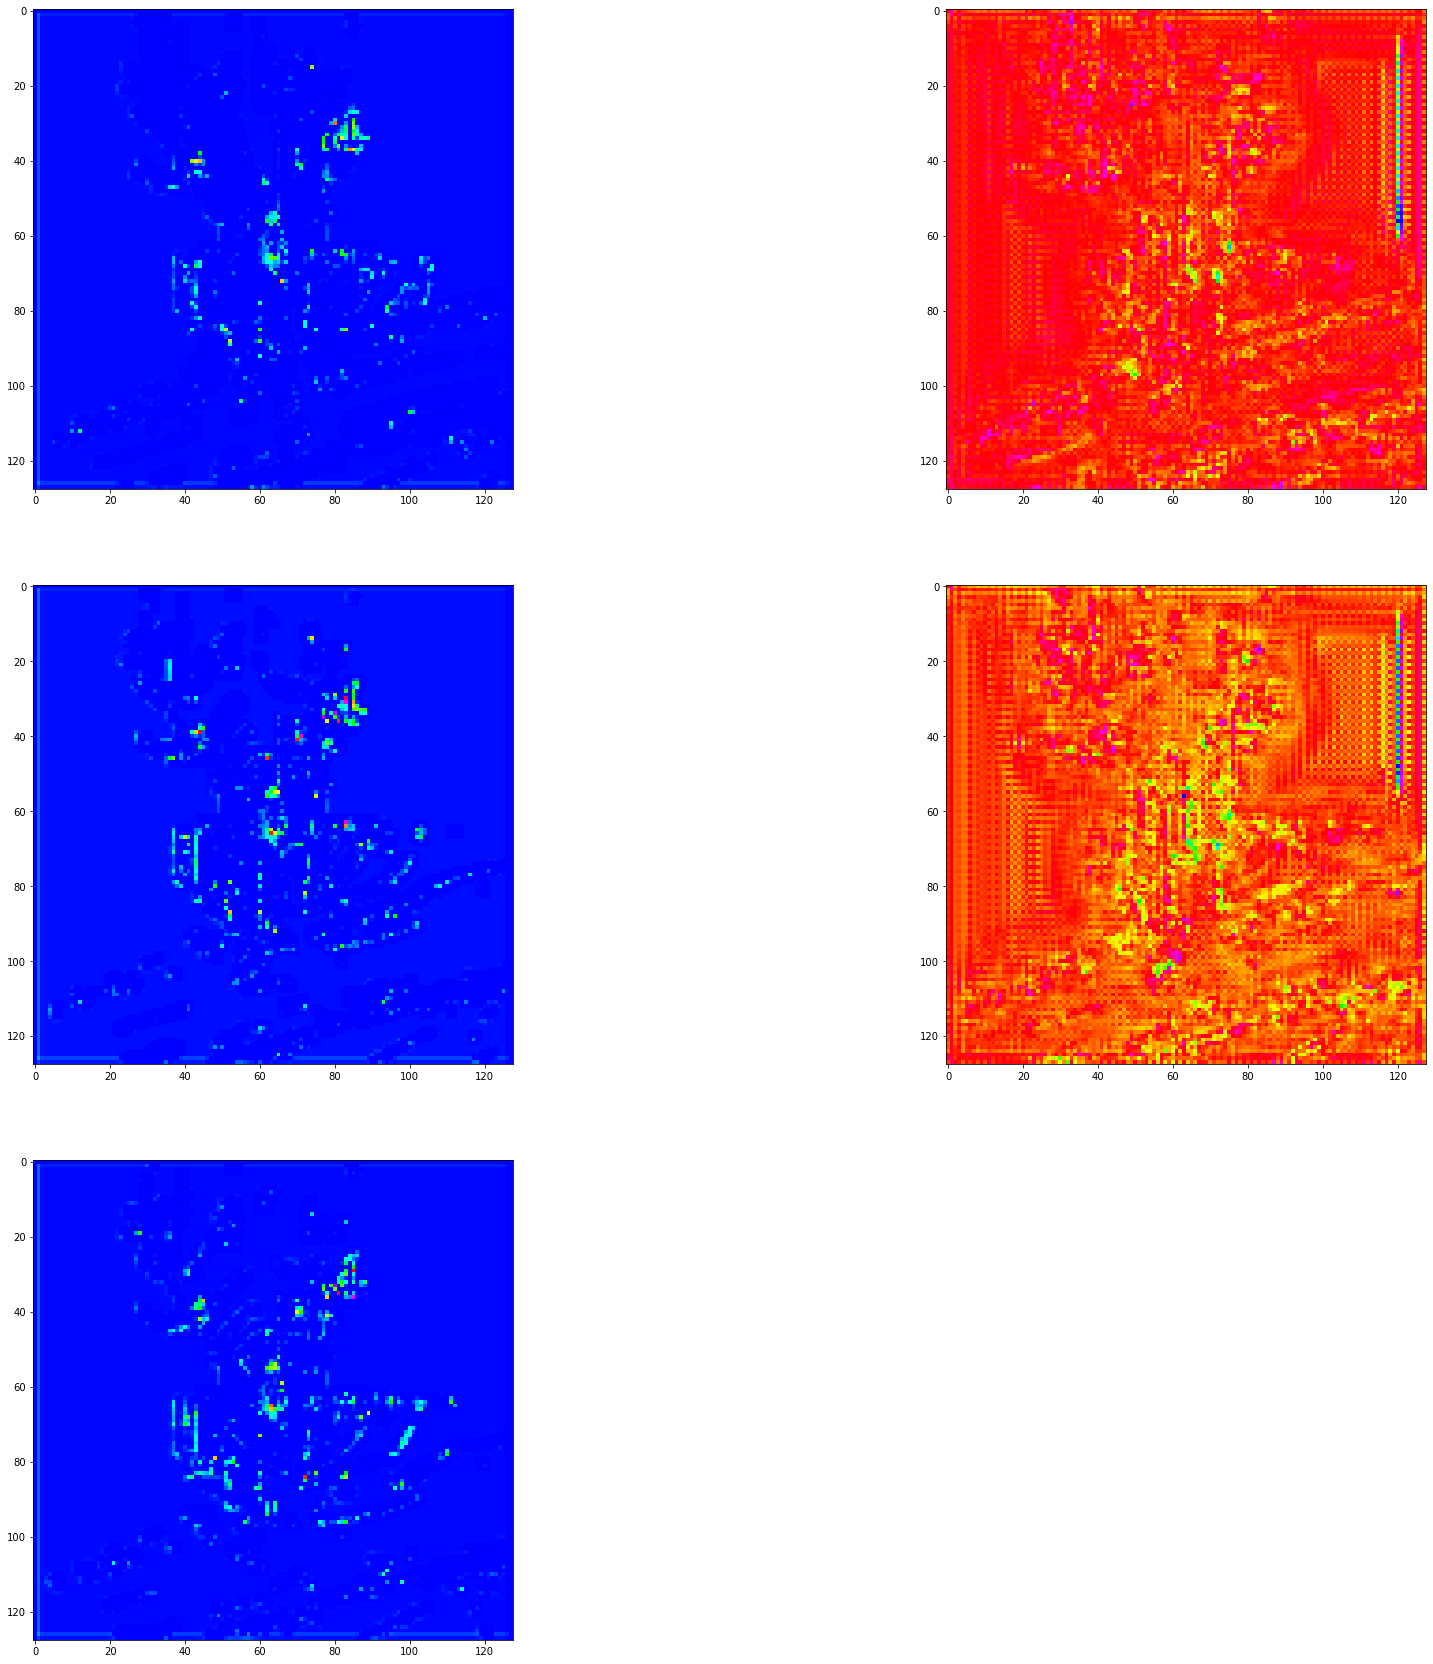

In [61]:
target_channel = 10
fig = plt.figure(figsize=(30,30))
rows, cols = 3,2
fig1 = fig.add_subplot(rows, cols, 1)
fig1.imshow(spatial_t_2_img[target_channel])


fig2 = fig.add_subplot(rows, cols, 2)
fig2.imshow(aligned_t_2_img[target_channel])

fig3 = fig.add_subplot(rows, cols, 3)
fig3.imshow(spatial_t_1_img[target_channel])

fig4 = fig.add_subplot(rows, cols, 4)
fig4.imshow(aligned_t_1_img[target_channel])

fig5 = fig.add_subplot(rows, cols, 5)
fig5.imshow(spatial_t_0_img[target_channel])
#plt.colorbar()
plt.show()

aligned_t_1_ = aligned_t_1[0,:,:]
print(aligned_t_1_.shape)
print(np.max(aligned_t_1_))
print(np.min(aligned_t_1_))

for i in range(aligned_t_1.shape[0]):
    if np.all(aligned_t_1[i] >= 0) & np.all(aligned_t_1[i] <= 1):
        continue
    else:
        print(f'{i}번째 channel에서 발견')

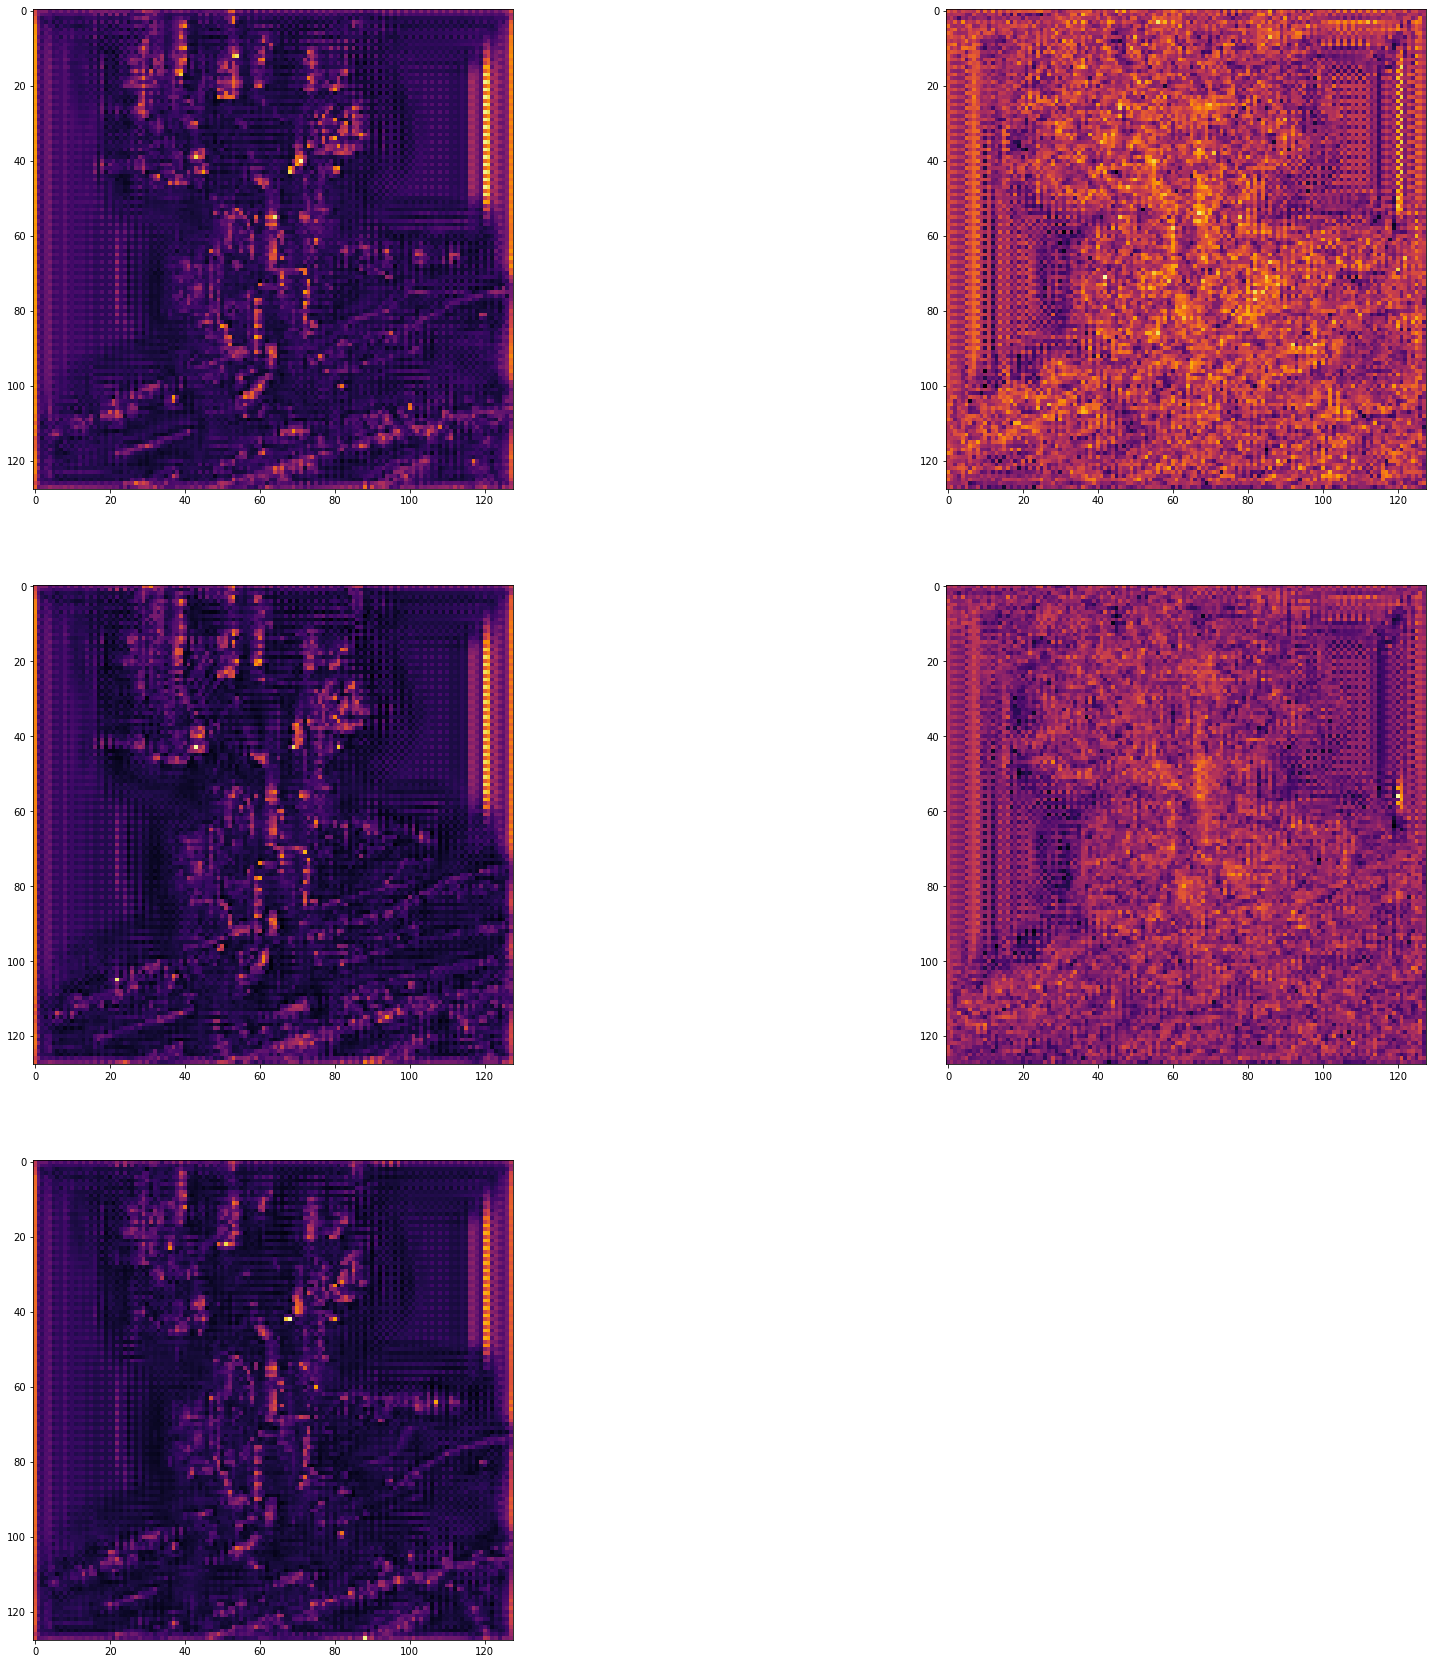

In [54]:
fig = plt.figure(figsize=(30,30))
rows, cols = 3,2
fig1 = fig.add_subplot(rows, cols, 1)
fig1.imshow(feature_avg_list[0], cmap='inferno')


fig2 = fig.add_subplot(rows, cols, 2)
fig2.imshow(feature_avg_list[1], cmap='inferno')

fig3 = fig.add_subplot(rows, cols, 3)
fig3.imshow(feature_avg_list[2], cmap='inferno')

fig4 = fig.add_subplot(rows, cols, 4)
fig4.imshow(feature_avg_list[3], cmap='inferno')

fig5 = fig.add_subplot(rows, cols, 5)
fig5.imshow(feature_avg_list[4], cmap='inferno')
#plt.colorbar()
plt.show()